<img src ='footballs.jpg'>

## Footballs analysis

Here I am analyzing footballs, their prices, variety and diversity from online shop https://pigu.lt/.
Data of scrapping the information: 2020-10-05. Overall there are 123 balls presenting 15 brands: Adidas, Puma, Spokey, Get & Go, Select, Meteor, Molten, Nike, Umbro, Atom, Real Madrid, Messi, FC Barcelona, Hudora, Avento.

In [1]:
import pathlib
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import chain

In [2]:
data_path = pathlib.Path('Data\\footballs.csv')

In [3]:
types = {'id': 'int64',
         'price_2020_10_05': 'float32',
         'item_nbr': 'int32',
         'size_1': 'int8',
         'size_2': 'int8',
         'size_3': 'int8',
         'size_4': 'int8',
         'size_5': 'int8',
         'natural_grass': 'int8',
         'artifical_grass': 'int8',
         'futsal': 'int8'}

As for NaN values:

* Brand - 1
* size_1 - 3
* size_2 - 3
* size_3 - 3
* size_4 - 3
* size_5 - 3
* natural_grass - 70
* artifical_grass - 70
* futsal - 70
* major_material - 6


One missed brand is 'Messi' brand, model was found via Google. <br>
Missing sizes were taken as '0' for all except **sizes_5**. <br>
As for nature of the grass - marked '0' for all except **natural_grass**. <br>
As for missing material data: default fillings are in *major_material_NaN.txt* file in Data folder. <br>
All NaN's were changed directly in the .csv file.

In [4]:
df_footballs = pd.read_csv(data_path, dtype=types)
print('Total rows:', str(df_footballs.shape[0]) + ', total columns:',str(df_footballs.shape[1]) + ".")
print('Null values:')
df_footballs.isnull().sum()

Total rows: 123, total columns: 17.
Null values:


name                0
color               0
id                  0
price_2020_10_05    0
weight              0
package             0
brand               0
size_1              0
size_2              0
size_3              0
size_4              0
size_5              0
natural_grass       0
artifical_grass     0
futsal              0
major_material      0
comments            0
dtype: int64

In [5]:
df_footballs

,name,color,id,price_2020_10_05,weight,package,brand,size_1,size_2,size_3,size_4,size_5,natural_grass,artifical_grass,futsal,major_material,comments
0,Puma Play,orange,31961037,11.950000,0.40,0.19x0.19x0.04,Puma,0,0,1,1,1,1,0,0,EVA,0
1,Puma Spin,orange,31961052,14.950000,0.42,0.2x0.2x0.04,Puma,0,0,1,1,1,1,1,1,TPU,0
2,Puma Spin,black,31961072,12.990000,0.40,0.2x0.2x0.04,Puma,0,0,0,1,1,1,1,1,TPU,0
3,Adidas Team J350,mix,28649595,27.950001,0.10,0.1x0.1x0.1,Adidas,0,0,0,1,0,1,0,0,TPU,0
4,Puma Future Flash Ball,mix,28439980,20.950001,0.10,0.1x0.1x0.1,Puma,0,0,0,1,1,1,0,0,TPU,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,Puma One Strap Ball,mix,28440235,20.950001,0.10,0.1x0.1x0.1,Puma,0,0,0,1,1,1,0,0,TPU,0
119,Adidas Uefa Mini,mix,28440345,15.950000,0.10,0.1x0.1x0.1,Adidas,1,0,0,0,0,1,0,0,TPU,0
120,Puma Final 6 MS Trainer White Yellow,yellow,28443445,19.950001,0.10,0.1x0.1x0.1,Puma,0,0,0,1,0,1,0,0,TPU,0
121,Get & Go 16SY,mix,28469525,5.490000,0.30,0.21x0.21x0.1,Get & Go,0,0,0,0,1,1,0,0,PVC,0


In [6]:
df_footballs.major_material.value_counts()

TPU                  57
PVC                  32
PU                   15
Rubber               14
Filcas                2
PET                   1
Artifical leather     1
EVA                   1
Name: major_material, dtype: int64

In [7]:
print('Median is: ', round(df_footballs['price_2020_10_05'].median(),2))
print('Mean is: ', round(df_footballs['price_2020_10_05'].mean(),2))

Median is:  19.95
Mean is:  19.3


In [8]:
df_footballs['brand'].value_counts().index

Index(['Adidas', 'Puma', 'Spokey', 'Get & Go', 'Select', 'Meteor', 'Molten',
       'Umbro', 'Atom', 'Nike', 'Real Madrid', 'Messi', 'Avento', 'Hudora',
       'FC Barcelona'],
      dtype='object')

In [9]:
brands_to_dict = df_footballs['brand'].value_counts().to_dict()

In [10]:
brandlist = []
for key, value in brands_to_dict.items():
    if value > 2:
        pass
    else:
        brandlist.append([key])
        
brandlist = list(chain(*brandlist))
print('Brands with less than 3 footballs available online:', brandlist)

Brands with less than 3 footballs available online: ['Real Madrid', 'Messi', 'Avento', 'Hudora', 'FC Barcelona']


In [11]:
df_brands = df_footballs.set_index('brand').drop(index=brandlist, axis=1)
print('After excluding brands with less than 3 footballs, total rows are:',df_brands.shape[0])

After excluding brands with less than 3 footballs, total rows are: 117


In [12]:
price_average = df_brands.groupby(['brand'])[['price_2020_10_05']].mean().sort_values(by='price_2020_10_05', ascending=False).round(decimals=2)
count = df_brands.groupby(['brand'])['id'].count().sort_values(ascending=False).to_dict()
price_average["count"] = pd.Series(count)
price_average

,price_2020_10_05,count
brand,,
Select,39.490002,5
Nike,24.980000,3
Molten,22.840000,4
Adidas,21.250000,53
Meteor,20.490000,5
Puma,18.250000,22
Umbro,14.280000,3
Spokey,10.290000,13
Atom,6.320000,3


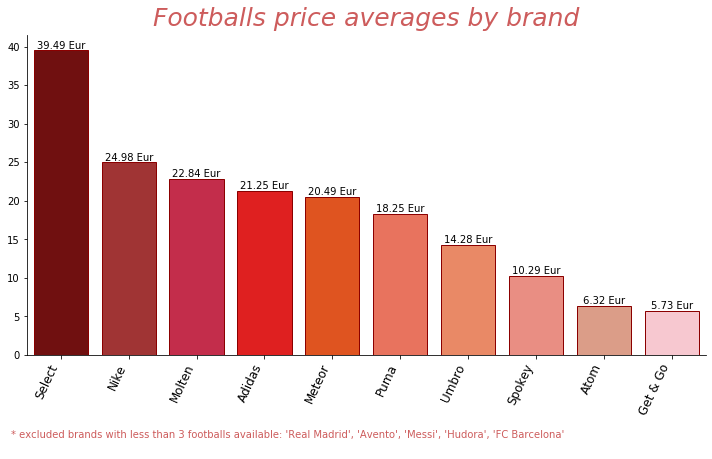

In [13]:
plt.figure(figsize=(10,6))
colors = ['maroon', 'firebrick','crimson','red', 'orangered', 'tomato', 'coral', 'salmon', 'darksalmon', 'pink']
sns.set_palette(sns.color_palette(colors))
price_average_plot = sns.barplot(x = price_average.index, y = price_average['price_2020_10_05'], edgecolor = 'darkred')
for item in price_average_plot.get_xticklabels():
    item.set_rotation(65)
plt.xticks(ha='right',fontweight='light',fontsize='large')
[plt.gca().spines[loc].set_visible(False) for loc in ['top', 'right']]
for a in price_average_plot.patches: 
    price_average_plot.annotate('{:.2f}'.format(a.get_height()) + ' Eur', (a.get_x()+0.4, a.get_height()),
                            ha='center', va='bottom', color= 'black') 
plt.xlabel(None)    
plt.ylabel(None)
plt.title(f'Footballs price averages by brand', fontsize=25, fontstyle='italic', y=1.01, color='indianred')
plt.figtext(.02, -.05,("\n"*4) +  """* excluded brands with less than 3 footballs available: 'Real Madrid', 'Avento', 'Messi', 'Hudora', 'FC Barcelona'\n""",
            color='indianred', weight='light' ) 
plt.tight_layout()

***Insight:*** the leader is SELECT, but this brand is represented only by 5 footballs. For comparison there are 53 Adidas footballs and 22 Puma footballs available in online shop. On the other hand SELECT specializes in high quality balls for football and futsal and do not offer a big variety at all.
As for Nike, it presents only 3 balls here despite the fact that in the best footballs  worldwide  brand ratings this manufacturer takes the second place after the Adidas (credits: http://soccerballpicks.com/top-10-best-soccer-ball-brand/).

In [14]:
mask = pd.Series(df_footballs['name']).str.contains('15|16|17|18', regex=True)
print('Have 15/16/17/18 in their name:',df_footballs[mask].shape[1], 'times')
df_footballs[mask].tail(10)

Have 15/16/17/18 in their name: 17 times


,name,color,id,price_2020_10_05,weight,package,brand,size_1,size_2,size_3,size_4,size_5,natural_grass,artifical_grass,futsal,major_material,comments
92,Adidas EURO16 GLIDER,mix,28377860,19.950001,0.1,0.1x0.1x0.1,Adidas,0,0,0,0,1,1,0,0,PVC,0
95,Adidas EURO16OLP ESP C,mix,28440495,19.950001,0.1,0.1x0.1x0.1,Adidas,0,0,0,0,1,1,0,0,TPU,0
96,Adidas EURO16TRAINPRO,mix,28440500,28.990000,0.1,0.1x0.1x0.1,Adidas,0,0,0,0,1,1,0,0,TPU,0
102,Adidas Finale18CB Cpt,mix,28377490,22.950001,0.1,0.1x0.1x0.1,Adidas,0,0,0,1,1,1,0,0,TPU,0
108,Get & Go 16SY,mix,28469530,5.490000,0.3,0.21x0.21x0.1,Get & Go,0,0,0,0,1,1,0,0,PVC,0
112,Adidas CONEXT15GLIDER,mix,28377775,17.950001,0.1,0.1x0.1x0.1,Adidas,0,0,0,0,1,1,0,0,TPU,0
113,Adidas EURO16 GLIDER,mix,28377820,19.950001,0.1,0.1x0.1x0.1,Adidas,0,0,0,0,1,1,0,0,PVC,0
114,Adidas EURO16PRAIA X,mix,28377855,19.950001,0.1,0.1x0.1x0.1,Adidas,0,0,0,0,1,1,0,0,Rubber,0
121,Get & Go 16SY,mix,28469525,5.490000,0.3,0.21x0.21x0.1,Get & Go,0,0,0,0,1,1,0,0,PVC,0
122,Get & Go 16SY,mix,28469535,5.490000,0.3,0.21x0.21x0.1,Get & Go,0,0,0,0,1,1,0,0,PVC,0


Filtering/masking brands (Adidas, Select, Spokey) who uses year in the model name.

In [15]:
mask_update = pd.Series(df_footballs[mask]['name']).str.lower().str.contains('adidas|select|spokey', regex=True)
old_models = mask_update.value_counts()[1]

In [16]:
dict_models = {'old_models': old_models,'rest': df_footballs.shape[0]-old_models}
df_models = pd.DataFrame.from_dict(dict_models,orient='index').rename(columns={0: "pcs"})
df_models

,pcs
old_models,22
rest,101


In [17]:
def plot_pie(df: pd.DataFrame,title: str):
    pie_plot = plt.pie(df, shadow=True, startangle=90, 
                   autopct='%1.2f%%', colors=['mistyrose','salmon'])
    plt.legend(labels=['target models', 'rest models'], loc=1)
    plt.axis('equal')
    plt.tight_layout()
    plt.title(title, fontsize=15,)
    my_circle=plt.Circle( (0,0), 0.75, color='white')
    plt.gca().add_artist(my_circle)
    plt.show(block=False)

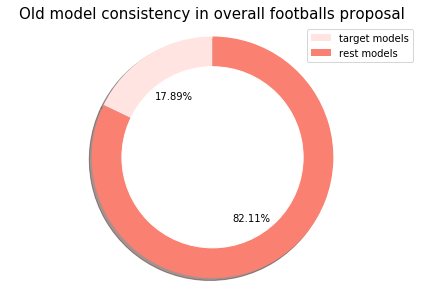

In [18]:
plot_pie(df_models['pcs'],'Old model consistency in overall footballs proposal')

***Insight:*** Inferring that every 5th football in the online shop corresponds to past football tournaments as contains 2016/2017/2018 in its name. It leads to a rather confined and out of date proposition.

In [19]:
futsal = df_footballs[(df_footballs['futsal'] == 1) & 
             (df_footballs['natural_grass'] + df_footballs['artifical_grass'] + df_footballs['futsal'] == 1) & 
             (df_footballs['size_4'] == 1)]
count_futsal = futsal['id'].count()

Filtering footballs which manufactured only for futsal.

In [20]:
dict_futsal = {'futsal_models': count_futsal,'rest': df_footballs.shape[0]-count_futsal}
df_futsal = pd.DataFrame.from_dict(dict_futsal,orient='index').rename(columns={0: "pcs"})
df_futsal

,pcs
futsal_models,8
rest,115


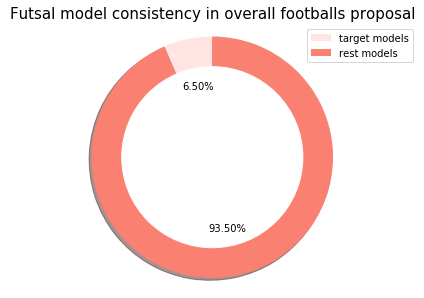

In [21]:
plot_pie(df_futsal['pcs'],'Futsal model consistency in overall footballs proposal')

***Insight:*** Each 16th football from an online shop proposal is proper for playing futsal. The winter is coming, so a lot of semi-pro players will begin their training and competitions indoors. Also Lithuania will hold a World Futsal tournament in 2021, so the demand in the market could increase. Furthermore the demand for indoor football boots seems to rise also but it is out of scope of this analysis.

In [22]:
art_grass = df_footballs[(df_footballs.artifical_grass == 1) & (df_footballs.futsal == 0)]
art_grass_count = art_grass['id'].count()
dict_artifical = {'art_grass_count': art_grass_count,'rest': df_footballs.shape[0]-art_grass_count}
df_art_grass = pd.DataFrame.from_dict(dict_artifical,orient='index').rename(columns={0: "pcs"})
df_art_grass

,pcs
art_grass_count,2
rest,121


Filtering footballs which designed and manufactured only for artificial grass.

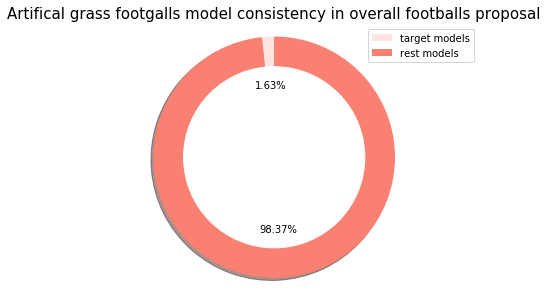

In [23]:
plot_pie(df_art_grass['pcs'],'Artifical grass footgalls model consistency in overall footballs proposal')

***Insight:*** The major part of training grounds, especially in Vilnius, where is the biggest amount of football entuziasts live and train, are artifical: pitch in Snipiskes district (2 training grounds: 'Fanu' and 'Senvages' stadium), Pilaite district (1 training ground: 'Pilaites maniezas'), Fabijoniskes district (1 training ground: 'Fabijoniskiu VFM' stadium),  Karoliniskes district (1 training ground: 'BFA maniezas'), Railway district (1 training ground: 'LFF' stadium) and Virsuliskiu district (1 training ground: 'SPORTIMA maniezas'). Footballs designed especially for artifical ground has better  performance and characteristics, but their proposal is miserable.

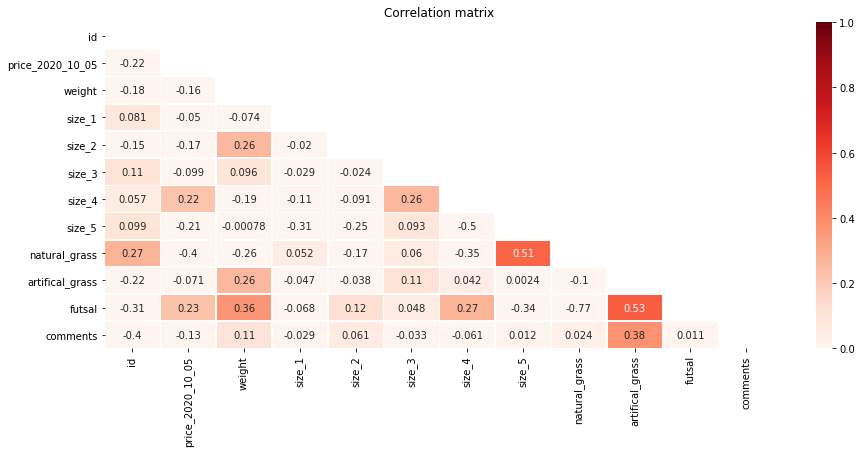

In [24]:
f, ax = plt.subplots(figsize=(15, 6))
mask_corr = np.triu(np.ones_like(df_footballs.corr(method='pearson'), dtype=bool))
sns.heatmap(df_footballs.corr(method='pearson'), annot=True, mask=mask_corr, robust=False,cmap='Reds', 
                                                                linewidths=.6, ax=ax, vmin=0, vmax=1)
plt.title('Correlation matrix', y=1.04)
plt.show()

***Insight:*** Correlation between variables shows their linear relationship. There is correlation between 'size_5' and 'natural_grass', as it is obviously the most common size to play on natural pitch. Also expected correlation between 'size_4' and 'futsal' as indoor football is mainly played with smaller than regular ball size. No need to pay much heed to the correlation between 'futsal' and 'artifical_grass', hard to figure out this interplay in reality. Derivable aspect from correlation matrix could be that futsal balls are heavier and more expensive (0.36 and 0.23 accordingly).

## Conclusion

1) Overall it is 15 different brands but only 10 of them represent more than 2 football models in an online shop. Moreover the biggest parts are taken by Adidas (53 of 123) and Puma (22 of 123), i.e.  60.98% of proposals are represented by 2 brands. So the diversity is not equally spread.

2) Average price is 19.30 Eur, price median is 19.95 Eur. It is more "first football/family ball" price than semi- or pro- football quality price. 

3) It is 6.50% futsal footballs models in proposal despite the fact that indoor season is coming and in 2021 Lithuania establishes Futsal World Cup and it can probably cause higher demand. Maybe it is an arguable point as futsal is not very popular in Lithuania, but as noticed above, the upcoming indoor season and World Tournament in 2021 can change things from the roots.

4) Despite the fact that a major part of football training grounds are artificial in Vilnius, almost all balls in proposal are designed for natural grass and only 2 footballs are only for artificial ground. Of course customers can play with regular football on the artificial grass or turf pitch but it could result in worse performance, terminated warranty and shorter term of usage.

On the other hand *pigu.lt* is not strongly sport oriented online shop, so these conclusions are more like recommendations and extracting one customer point of view.